In [2]:
import pandas as pd
from web3 import Web3
import time

ganache_url = "http://127.0.0.1:7545"
web3 = Web3(Web3.HTTPProvider(ganache_url))

if web3.is_connected():
    print("✅ Connected to Ganache successfully!")
else:
    print("❌ Connection failed. Ensure Ganache is running.")

✅ Connected to Ganache successfully!


In [3]:
# Load IoT sensor data from CSV (Generated in Homework 1)
df = pd.read_csv("../data/fitness_mstracker_data.csv")

# Display the first few rows
print(df.head())

                    timestamp   user_id      activity_type  duration_minutes  \
0  2025-05-30 12:36:38.400715  USER8290  Strength Training                19   
1  2025-05-30 13:07:38.400715  USER6338               Walk                22   
2  2025-05-30 22:24:38.400715  USER8347               Yoga                64   
3  2025-05-30 04:58:38.400715  USER6468               Walk                70   
4  2025-05-30 23:16:38.401722  USER9082               Walk                82   

   steps  calories_burned  avg_heart_rate  
0      0             99.9             125  
1   5940            126.5             109  
2      0            366.8              81  
3   6465            682.2              87  
4  11450            576.5             116  


In [4]:
# Replace with your actual Remix contract address
contract_address = "0xc81c805F9079c041dA2F149A4073096f8164eD90"

# Replace with your actual ABI copied from Remix
abi = [
	{
		"anonymous": False,
		"inputs": [
			{
				"indexed": False,
				"internalType": "string",
				"name": "userId",
				"type": "string"
			},
			{
				"indexed": False,
				"internalType": "string",
				"name": "timestamp",
				"type": "string"
			},
			{
				"indexed": False,
				"internalType": "string",
				"name": "activityType",
				"type": "string"
			},
			{
				"indexed": False,
				"internalType": "uint256",
				"name": "durationMinutes",
				"type": "uint256"
			},
			{
				"indexed": False,
				"internalType": "uint256",
				"name": "steps",
				"type": "uint256"
			},
			{
				"indexed": False,
				"internalType": "uint256",
				"name": "caloriesBurned",
				"type": "uint256"
			},
			{
				"indexed": False,
				"internalType": "uint256",
				"name": "avgHeartRate",
				"type": "uint256"
			}
		],
		"name": "DataStored",
		"type": "event"
	},
	{
		"inputs": [
			{
				"internalType": "string",
				"name": "_userId",
				"type": "string"
			},
			{
				"internalType": "string",
				"name": "_timestamp",
				"type": "string"
			},
			{
				"internalType": "string",
				"name": "_activityType",
				"type": "string"
			},
			{
				"internalType": "uint256",
				"name": "_durationMinutes",
				"type": "uint256"
			},
			{
				"internalType": "uint256",
				"name": "_steps",
				"type": "uint256"
			},
			{
				"internalType": "uint256",
				"name": "_caloriesBurned",
				"type": "uint256"
			},
			{
				"internalType": "uint256",
				"name": "_avgHeartRate",
				"type": "uint256"
			}
		],
		"name": "storeData",
		"outputs": [],
		"stateMutability": "nonpayable",
		"type": "function"
	},
	{
		"inputs": [
			{
				"internalType": "uint256",
				"name": "index",
				"type": "uint256"
			}
		],
		"name": "getRecord",
		"outputs": [
			{
				"internalType": "string",
				"name": "",
				"type": "string"
			},
			{
				"internalType": "string",
				"name": "",
				"type": "string"
			},
			{
				"internalType": "string",
				"name": "",
				"type": "string"
			},
			{
				"internalType": "uint256",
				"name": "",
				"type": "uint256"
			},
			{
				"internalType": "uint256",
				"name": "",
				"type": "uint256"
			},
			{
				"internalType": "uint256",
				"name": "",
				"type": "uint256"
			},
			{
				"internalType": "uint256",
				"name": "",
				"type": "uint256"
			}
		],
		"stateMutability": "view",
		"type": "function"
	},
	{
		"inputs": [],
		"name": "getTotalRecords",
		"outputs": [
			{
				"internalType": "uint256",
				"name": "",
				"type": "uint256"
			}
		],
		"stateMutability": "view",
		"type": "function"
	},
	{
		"inputs": [
			{
				"internalType": "uint256",
				"name": "",
				"type": "uint256"
			}
		],
		"name": "records",
		"outputs": [
			{
				"internalType": "string",
				"name": "userId",
				"type": "string"
			},
			{
				"internalType": "string",
				"name": "timestamp",
				"type": "string"
			},
			{
				"internalType": "string",
				"name": "activityType",
				"type": "string"
			},
			{
				"internalType": "uint256",
				"name": "durationMinutes",
				"type": "uint256"
			},
			{
				"internalType": "uint256",
				"name": "steps",
				"type": "uint256"
			},
			{
				"internalType": "uint256",
				"name": "caloriesBurned",
				"type": "uint256"
			},
			{
				"internalType": "uint256",
				"name": "avgHeartRate",
				"type": "uint256"
			}
		],
		"stateMutability": "view",
		"type": "function"
	}
]  # Your contract ABI here (as a Python list)

In [5]:
contract = web3.eth.contract(address=contract_address, abi=abi)
web3.eth.default_account = web3.eth.accounts[0]
print(f"✅ Connected to Smart Contract at {contract_address}")

✅ Connected to Smart Contract at 0xc81c805F9079c041dA2F149A4073096f8164eD90


In [22]:
# OLD DUMMY DATA TESTER
#txn = contract.functions.storeData("TEST001", "Temperature", "22.5°C").transact({
#    'from': web3.eth.default_account,
#    'gas': 1000000
#})
#
#web3.eth.wait_for_transaction_receipt(txn)
#print("✅ Dummy data stored on blockchain!")

In [6]:
# Define data upload function
def send_iot_data(row):
    txn = contract.functions.storeData(
        str(row["user_id"]),
        str(row["timestamp"]),
        str(row["activity_type"]),
        int(row["duration_minutes"]),
        int(row["steps"]),
        int(row["calories_burned"]),
        int(row["avg_heart_rate"])
    ).transact({
        'from': web3.eth.default_account,
        'gas': 3000000
    })

    receipt = web3.eth.wait_for_transaction_receipt(txn)
    print(f"✅ Data: {row['user_id']} | {row['activity_type']} | {row['steps']} steps | {row['calories_burned']} cal | {row['avg_heart_rate']}")

In [24]:
# Auto Loop through the dataset and send all rows
for _, row in df.iterrows():
    send_iot_data(row)
    time.sleep(1)  # Optional delay

✅ Stored: Strength Training | 0 steps | 99.9 cal | USER8290
✅ Stored: Walk | 5940 steps | 126.5 cal | USER6338
✅ Stored: Yoga | 0 steps | 366.8 cal | USER8347
✅ Stored: Walk | 6465 steps | 682.2 cal | USER6468
✅ Stored: Walk | 11450 steps | 576.5 cal | USER9082
✅ Stored: Strength Training | 0 steps | 105.2 cal | USER9724
✅ Stored: Swimming | 0 steps | 591.6 cal | USER1710
✅ Stored: Strength Training | 0 steps | 553.5 cal | USER5887
✅ Stored: Run | 13751 steps | 133.9 cal | USER7883
✅ Stored: Swimming | 0 steps | 745.3 cal | USER5786
✅ Stored: Walk | 2743 steps | 226.0 cal | USER3561
✅ Stored: Yoga | 0 steps | 107.2 cal | USER7681
✅ Stored: Run | 7198 steps | 190.6 cal | USER1911
✅ Stored: Run | 2499 steps | 114.5 cal | USER1009
✅ Stored: Run | 13139 steps | 117.8 cal | USER3013
✅ Stored: Swimming | 0 steps | 246.3 cal | USER5979
✅ Stored: Strength Training | 0 steps | 805.3 cal | USER5129
✅ Stored: Swimming | 0 steps | 746.1 cal | USER4185
✅ Stored: Yoga | 0 steps | 432.9 cal | USER673

In [25]:
# Old - Updated to get combine with total records
#record = contract.functions.getRecord(0).call()
#print("First Stored Record:", record)

In [26]:
# Confirm upload
total_records = contract.functions.getTotalRecords().call()
print(f"📦 Total records on blockchain: {total_records}")

# Display first record
first = contract.functions.getRecord(0).call()
print("🔍 First Stored Record:", first)

📦 Total records on blockchain: 576
🔍 First Stored Record: ['USER8290', '2025-05-30 12:36:38.400715', 'Strength Training', 19, 0, 99, 125]


In [8]:
#Data Retrieval from Smart Contract
import pandas as pd

total_records = contract.functions.getTotalRecords().call()
print(f"📦 Total fitness records stored: {total_records}")

data = []

for i in range(total_records):
    record = contract.functions.getRecord(i).call()
    data.append({
        "timestamp": record[1],           # Already in String format, no need for conversion
        "user_id": record[0],
        "activity_type": record[2],
        "duration_minutes": record[3],
        "steps": record[4],
        "calories_burned": record[5],
        "avg_heart_rate": record[6]
    })

df = pd.DataFrame(data)
print(df.head())

📦 Total fitness records stored: 576
                    timestamp   user_id      activity_type  duration_minutes  \
0  2025-05-30 12:36:38.400715  USER8290  Strength Training                19   
1  2025-05-30 13:07:38.400715  USER6338               Walk                22   
2  2025-05-30 22:24:38.400715  USER8347               Yoga                64   
3  2025-05-30 04:58:38.400715  USER6468               Walk                70   
4  2025-05-30 23:16:38.401722  USER9082               Walk                82   

   steps  calories_burned  avg_heart_rate  
0      0               99             125  
1   5940              126             109  
2      0              366              81  
3   6465              682              87  
4  11450              576             116  


In [ ]:
# Processing of retrieved Data to readable formats
# Fills any missing values with 0 (if any)
df.fillna(0, inplace=True)

# Convert all numeric columns to int/float (if needed)
df["duration_minutes"] = df["duration_minutes"].astype(int)
df["steps"] = df["steps"].astype(int)
df["calories_burned"] = df["calories_burned"].astype(int)
df["avg_heart_rate"] = df["avg_heart_rate"].astype(int)

print(df.head())

In [10]:
# Save to CSV
df.to_csv("../data/cleaned_fitness_data.csv", index=False) # We can modify filename as per prescribed format
print("✅ Cleaned fitness data saved in /data/ folder as cleaned_fitness_data.csv") 

✅ Cleaned fitness data saved in /data/ folder as cleaned_fitness_data.csv


In [18]:
# Load Data - Week #7 HW
import pandas as pd

# Load your cleaned fitness data
df = pd.read_csv("../data/cleaned_fitness_data.csv")

# Print first few rows for verification
print(df.head())

                    timestamp   user_id      activity_type  duration_minutes  \
0  2025-05-30 12:36:38.400715  USER8290  Strength Training                19   
1  2025-05-30 13:07:38.400715  USER6338               Walk                22   
2  2025-05-30 22:24:38.400715  USER8347               Yoga                64   
3  2025-05-30 04:58:38.400715  USER6468               Walk                70   
4  2025-05-30 23:16:38.401722  USER9082               Walk                82   

   steps  calories_burned  avg_heart_rate  
0      0               99             125  
1   5940              126             109  
2      0              366              81  
3   6465              682              87  
4  11450              576             116  


In [13]:
# Convert timestamps  - for plot imports
df["timestamp"] = pd.to_datetime(df["timestamp"])

In [17]:
# Import required libraries for plotting data

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid") # Visualization style

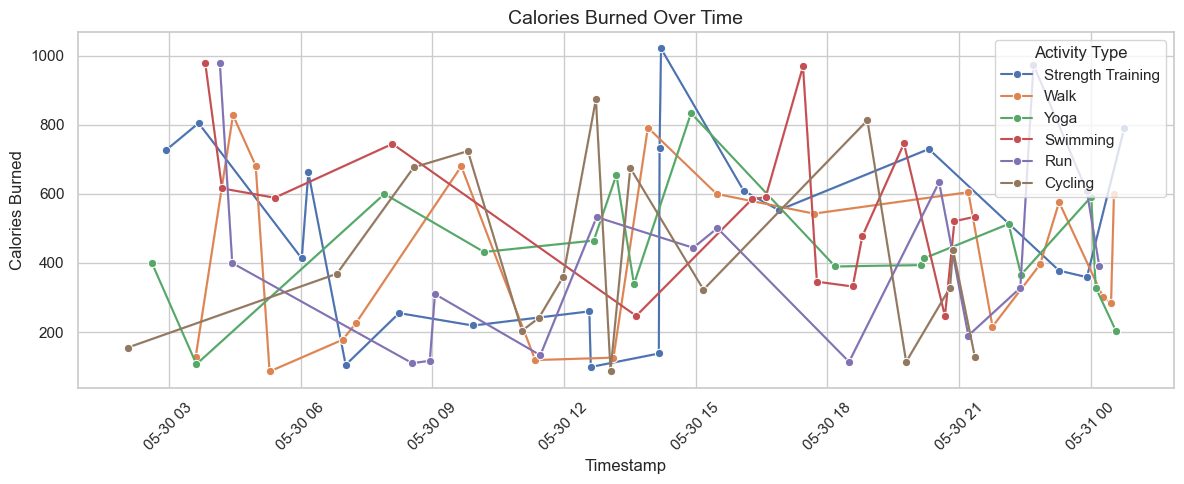

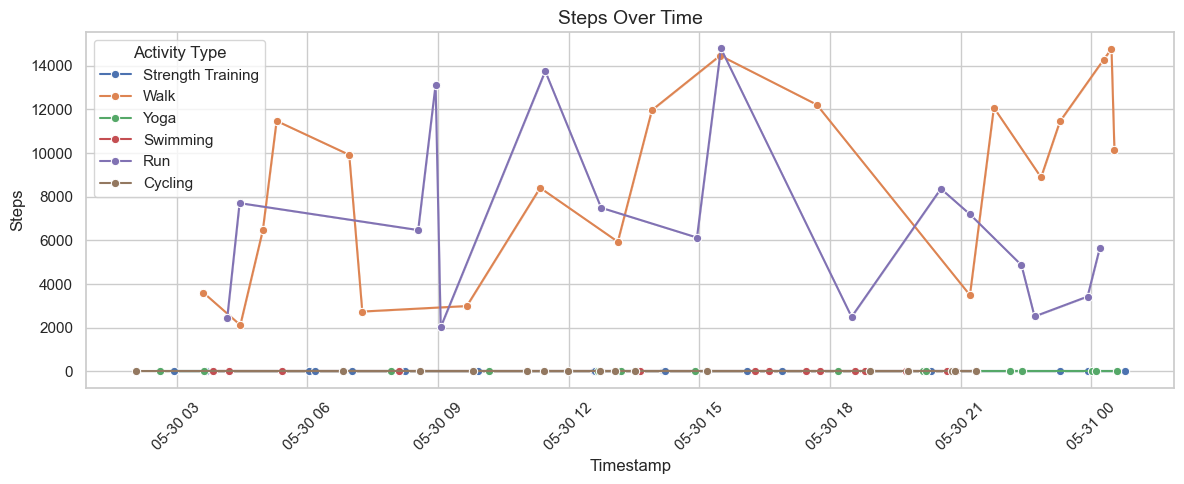

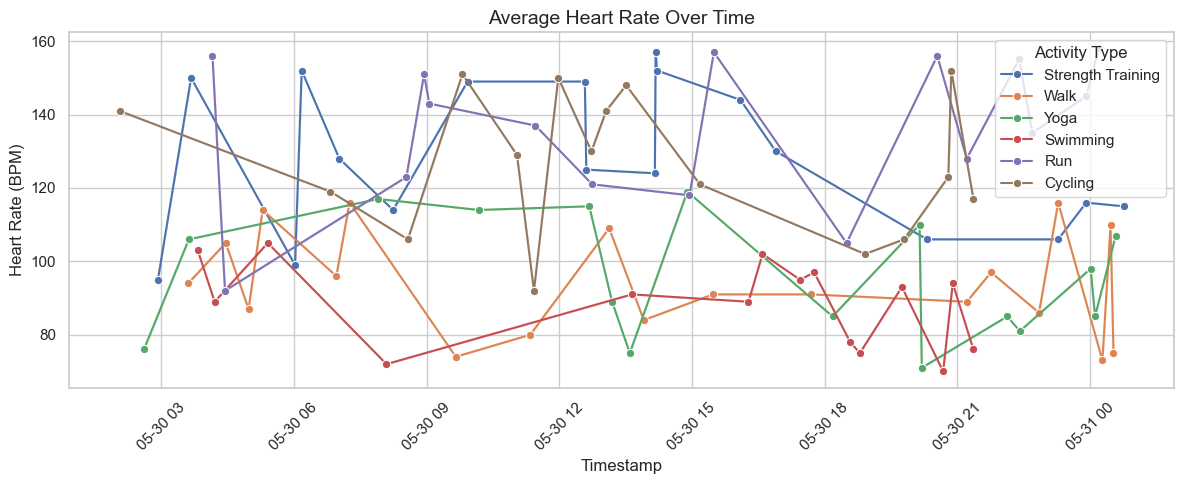

In [16]:
# Line plots for data

# Calories Burned Over Time
plt.figure(figsize=(12, 5))
sns.lineplot(x="timestamp", y="calories_burned", hue="activity_type", data=df, marker="o")
plt.title("Calories Burned Over Time", fontsize=14)
plt.xlabel("Timestamp")
plt.ylabel("Calories Burned")
plt.xticks(rotation=45)
plt.legend(title="Activity Type")
plt.tight_layout()
plt.show()

# Steps Over Time
plt.figure(figsize=(12, 5))
sns.lineplot(x="timestamp", y="steps", hue="activity_type", data=df, marker="o")
plt.title("Steps Over Time", fontsize=14)
plt.xlabel("Timestamp")
plt.ylabel("Steps")
plt.xticks(rotation=45)
plt.legend(title="Activity Type")
plt.tight_layout()
plt.show()

# Heart Rate Over Time
plt.figure(figsize=(12, 5))
sns.lineplot(x="timestamp", y="avg_heart_rate", hue="activity_type", data=df, marker="o")
plt.title("Average Heart Rate Over Time", fontsize=14)
plt.xlabel("Timestamp")
plt.ylabel("Heart Rate (BPM)")
plt.xticks(rotation=45)
plt.legend(title="Activity Type")
plt.tight_layout()
plt.show()